<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Data Cleaning

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from datetime import datetime

## Order Dataset

In [4]:
order_df = pd.read_csv('olist_orders_dataset.csv')

In [5]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
order_df.drop(['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date'], axis='columns', inplace=True)

In [7]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
order_id                    99441 non-null object
customer_id                 99441 non-null object
order_purchase_timestamp    99441 non-null object
dtypes: object(3)
memory usage: 2.3+ MB


In [8]:
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df.dtypes

order_id                            object
customer_id                         object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [9]:
order_df[order_df.duplicated()]

,order_id,customer_id,order_purchase_timestamp


In [10]:
order_df.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


## Payment Dataset

In [11]:
payment_df = pd.read_csv('olist_order_payments_dataset.csv')

In [12]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [13]:
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
#payment_df.drop(['payment_sequential', 'payment_type','payment_installments'], axis='columns', inplace=True)
#payment_df.head()

In [15]:
payment_df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

## Customer Dataset

In [16]:
customer_df = pd.read_csv('olist_customers_dataset.csv')

In [17]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [18]:
customer_df.drop('customer_zip_code_prefix', axis='columns', inplace=True)
customer_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state'], dtype='object')

In [19]:
customer_df[customer_df.duplicated()]

,customer_id,customer_unique_id,customer_city,customer_state


In [20]:
customer_df.nunique()

customer_id           99441
customer_unique_id    96096
customer_city          4119
customer_state           27
dtype: int64

In [21]:
customer_df.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


## Item Dataset

In [22]:
item_df = pd.read_csv('olist_order_items_dataset.csv')

In [23]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
item_df.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [25]:
item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Product Dataset

In [26]:
product_df = pd.read_csv('olist_products_dataset.csv')

In [27]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
product_df.isna().mean()*100

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [29]:
product_df.fillna(product_df.median(), inplace=True)
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32951 non-null float64
product_description_lenght    32951 non-null float64
product_photos_qty            32951 non-null float64
product_weight_g              32951 non-null float64
product_length_cm             32951 non-null float64
product_height_cm             32951 non-null float64
product_width_cm              32951 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [30]:
product_df.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [31]:
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## Review Dataset

In [32]:
review_df = pd.read_csv('olist_order_reviews_dataset.csv')

In [33]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


# Exploratory Data Analytics

In [41]:
order_df.groupby('order_purchase_timestamp')['customer_id'].count()

order_purchase_timestamp
2016-09-04 21:15:19    1
2016-09-05 00:15:34    1
2016-09-13 15:24:19    1
2016-09-15 12:16:38    1
2016-10-02 22:07:52    1
                      ..
2018-09-29 09:13:03    1
2018-10-01 15:30:09    1
2018-10-03 18:55:29    1
2018-10-16 20:16:02    1
2018-10-17 17:30:18    1
Name: customer_id, Length: 98875, dtype: int64

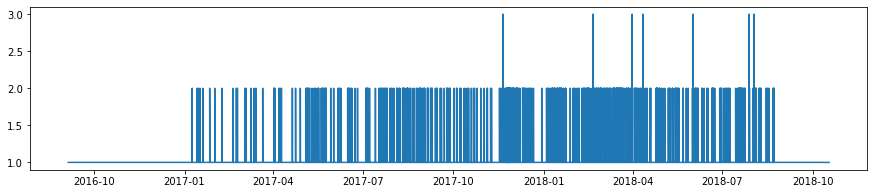

In [73]:
plt.figure(figsize=(15, 3))
plt.plot(order_df.groupby('order_purchase_timestamp')['order_id'].count());

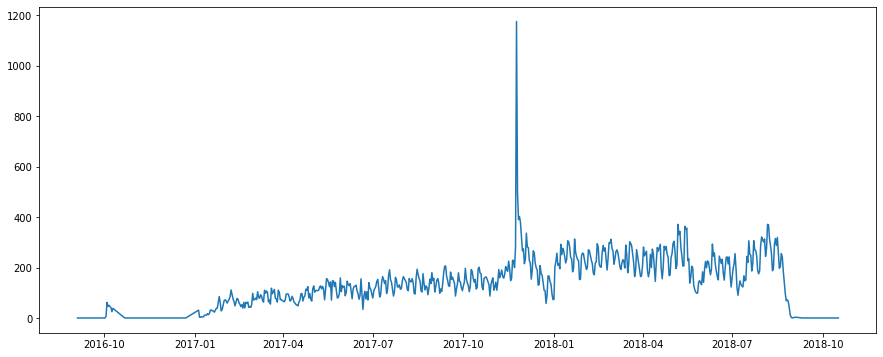

In [72]:
plt.figure(figsize=(15,6))
order_df['purchase_date'] = order_df['order_purchase_timestamp'].dt.date
plt.plot(order_df.groupby('purchase_date')['order_id'].count())

In [70]:
order_df.loc[order_df['purchase_date'] > datetime.date(2018, 9, 1)]

,order_id,customer_id,order_purchase_timestamp,purchase_date
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,2018-09-20 13:54:16,2018-09-20
5149,ea844c92cf978ea23321fa7fe5871761,6ddc45ad08e6a2c885ca2255fc52d6df,2018-09-13 09:56:12,2018-09-13
9976,87ae60ef8b08ae0e5f903cacb53a6904,fea4d57ed3a45455f89c25ef3dae8ee8,2018-09-11 16:45:54,2018-09-11
16366,bd35b677fd239386e9861d11ae98ab56,ad2eb5d02c0808bcd8743117f6383cf6,2018-09-17 17:21:16,2018-09-17
20778,4d59cc2a2e7bb6c0a851725f5888a9b5,ead83a4f8f7be8c3034b2e98754a6147,2018-09-06 14:50:07,2018-09-06
24410,0d3adebce4bebc1f80a7f36e9833f497,a7c87c25dbdded68c26c640582cb5ddb,2018-09-03 18:40:50,2018-09-03
31170,21a00b08cbeb5716bbb66105e3dbd850,002b5342c72978cf0aba6aae1f5d5293,2018-09-10 17:51:25,2018-09-10
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,2018-10-03 18:55:29,2018-10-03
33979,5aac76cf7b07dd06fa4d50bf461d2f40,7a8a02e54cf3472df427e927f8b9c046,2018-09-25 11:59:18,2018-09-25
37003,869997fbe01f39d184956b5c6bccfdbe,55c9dad94ec1a2ba57998bdb376c230a,2018-09-26 08:40:15,2018-09-26


In [74]:
payment_order_df = pd.merge(payment_df, order_df, how='left', on='order_id')
payment_order_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp,purchase_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-12
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21 13:59:17,2018-05-21


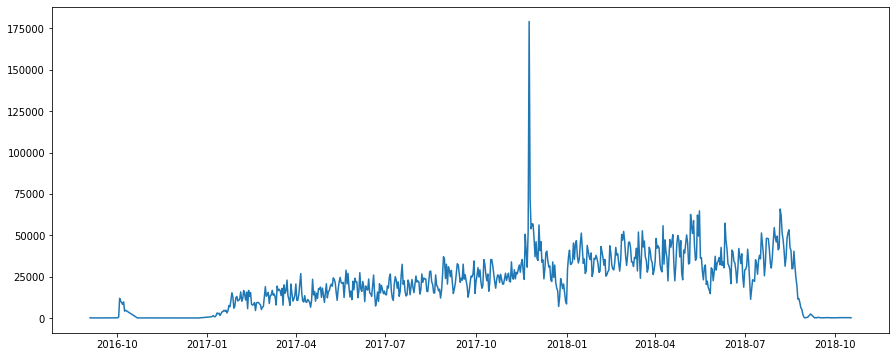

In [77]:
plt.figure(figsize=(15,6))
plt.plot(payment_order_df.groupby('purchase_date')['payment_value'].sum());

## Sales by Paymeny Type

In [58]:
payment_by_type = pay_order_cust_df.groupby('payment_type').agg({'payment_type':'count', 'payment_value':'sum'})
payment_by_type['avg_payment'] = payment_by_type['payment_value'] / payment_by_type['payment_type']
payment_by_type

,payment_type,payment_value,avg_payment
payment_type,,,
boleto,19784,2.869361e+06,145.034435
credit_card,76795,1.254208e+07,163.319021
debit_card,1529,2.179898e+05,142.570170
not_defined,3,0.000000e+00,0.000000
voucher,5775,3.794369e+05,65.703354


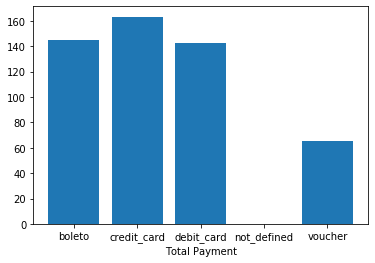

In [59]:
plt.bar(payment_by_type.index, payment_by_type['avg_payment'])
plt.xlabel('Total Payment');

## Sales by Number of Installments

In [34]:
pay_by_install = payment_order_df.groupby('payment_installments').agg({'order_id':'count', 'payment_value':'mean'})
pay_by_install

,order_id,payment_value
payment_installments,,
0,2,94.315000
1,52546,112.420229
2,12413,127.228150
3,10461,142.539317
4,7098,163.976840
5,5239,183.465222
6,3920,209.849952
7,1626,187.673672
8,4268,307.737427


Text(0.5, 0, 'Average Payment')

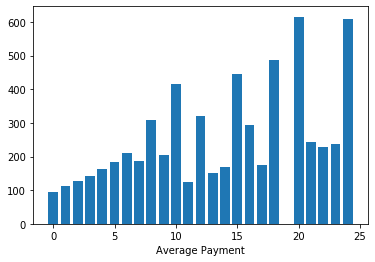

In [35]:
plt.bar(pay_by_install.index, pay_by_install['payment_value'])
plt.xlabel('Payment Installments')

In [67]:
new_df = new_df.groupby(['customer_state']).agg({'revenue_rate':'sum', 'customer_unique_id':'count'})
new_df.head()

,revenue_rate,customer_unique_id
customer_state,,
AC,75.144788,84
AL,373.356543,427
AM,113.455039,154
AP,59.569705,70
BA,2714.332759,3610


In [68]:
new_df['average_revenue_rate'] = new_df['revenue_rate'] / new_df['customer_unique_id']
new_df

,revenue_rate,customer_unique_id,average_revenue_rate
customer_state,,,
AC,75.144788,84,0.894581
AL,373.356543,427,0.874371
AM,113.455039,154,0.736721
AP,59.569705,70,0.850996
BA,2714.332759,3610,0.751893
CE,1161.645602,1398,0.830934
DF,1569.720400,2204,0.712214
ES,1493.424099,2107,0.708792
GO,1586.212466,2112,0.751048


Text(0.5, 0, 'Revenue per Day per Customer')

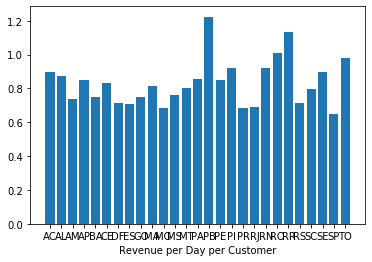

In [69]:
plt.bar(new_df.index, new_df['average_revenue_rate'])
plt.xlabel('Revenue per Day per Customer')

In [70]:
#pd.merge(payment_order_df, product_df, how='left', on=)

SyntaxError: invalid syntax (<ipython-input-70-5336c016eb11>, line 1)

In [71]:
sum_by_state = pay_order_cust_df.groupby(['customer_state']).sum()
sum_by_state.head()

,payment_sequential,payment_installments,payment_value
customer_state,,,
AC,87,299,19680.62
AL,444,1589,96962.06
AM,163,504,27966.93
AP,72,183,16262.80
BA,4025,11509,616645.82


<BarContainer object of 27 artists>

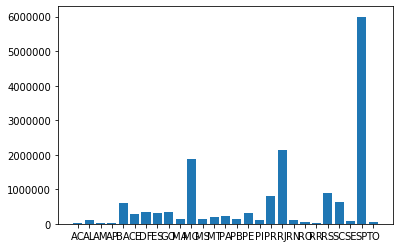

In [72]:
plt.bar(pay_order_cust_df.groupby(['customer_state']).sum().index, pay_order_cust_df.groupby(['customer_state']).sum()['payment_value'])


In [73]:
avg_payment_by_state = pay_order_cust_df.groupby(['customer_state']).agg({'payment_value':'sum', 'customer_unique_id':'count'})
avg_payment_by_state.head()

,payment_value,customer_unique_id
customer_state,,
AC,19680.62,84
AL,96962.06,427
AM,27966.93,154
AP,16262.80,70
BA,616645.82,3610


In [75]:
avg_payment_by_state['average_payment'] = avg_payment_by_state['payment_value'] / avg_payment_by_state['customer_unique_id']

<BarContainer object of 27 artists>

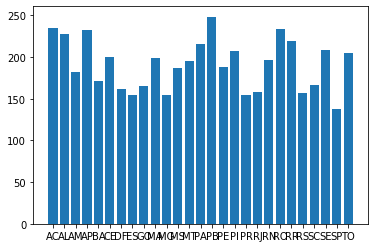

In [76]:
plt.bar(avg_payment_by_state.index, avg_payment_by_state['average_payment'])

## Sales by Category

In [40]:
item_product_df = pd.merge(item_df, product_df, how='left', on='product_id')
item_product_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [41]:
translation_df = pd.read_csv('product_category_name_translation.csv')
translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [42]:
item_product_df = pd.merge(item_product_df, translation_df, how='left', on='product_category_name')
item_product_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


In [43]:
payment_by_category = item_product_df.groupby('product_category_name_english')['price'].sum()


In [44]:
payment_by_category.sort_values(ascending=False, inplace=True)

<BarContainer object of 71 artists>

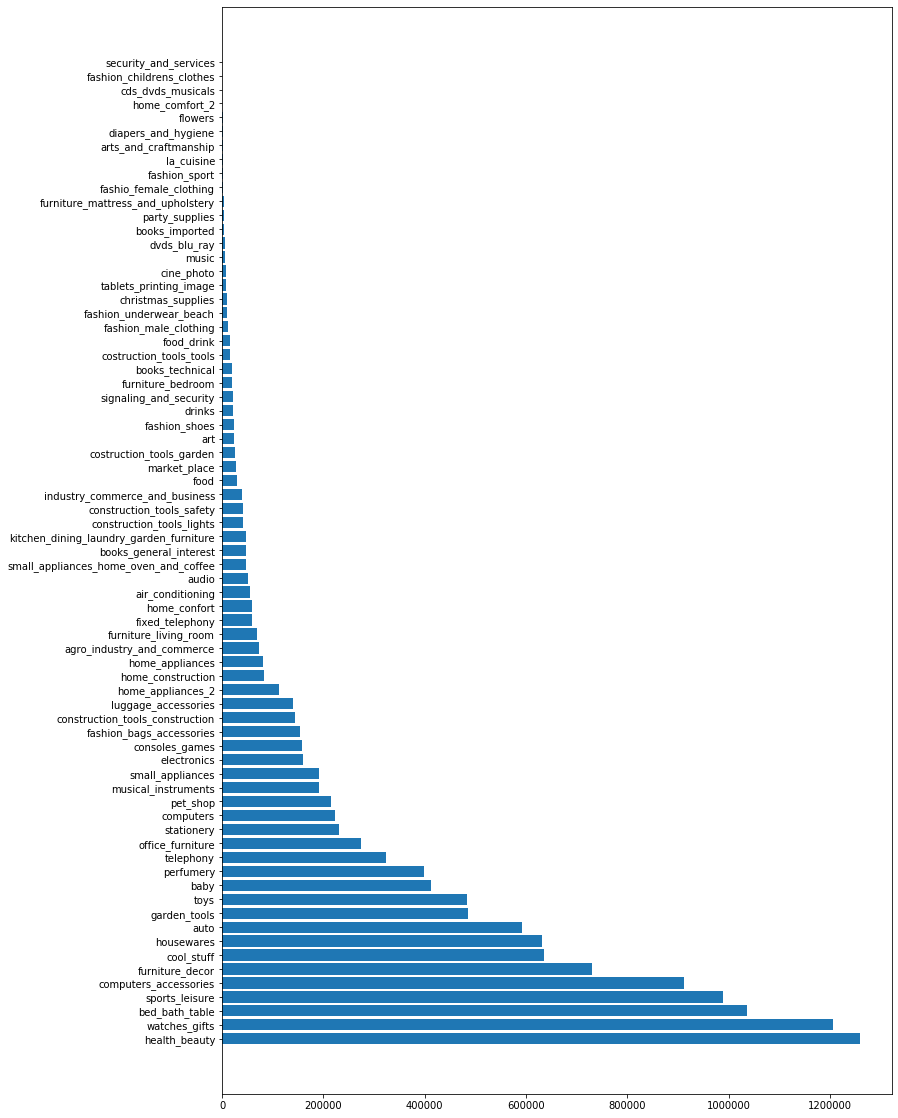

In [45]:
plt.figure(figsize=(12,20))
plt.barh(payment_by_category.index, payment_by_category)

## Sales by Review Scores

In [46]:
pay_order_review_df = pd.merge(payment_order_df, review_df, how='left', on='order_id')
pay_order_review_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,ad2036caca61484fc435d7e673c020f2,5,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,c37a0e51e5df82bdb55d38ff0ffb6af3,5,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,5bc7680443b4ef765fec11a8201eeb0c,5,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104480,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,2018-03-08 16:57:23,9f402e937d15b4664948410079ab687d,5,NaN,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08
104481,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,2017-08-18 09:45:35,f78d2909c6c202d3cabb8bac3fc00e75,5,NaN,NaN,2017-08-24 00:00:00,2017-08-25 19:38:31
104482,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,2017-11-18 17:27:14,2cdb88f8dce688bb85e20a5cf069e589,1,NaN,NaN,2017-12-07 00:00:00,2017-12-07 09:00:59
104483,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,2018-08-07 23:26:13,6c698e5d193ab18db7615ea75a28866e,5,NaN,NaN,2018-08-22 00:00:00,2018-08-23 15:29:34


In [47]:
pay_by_review = pay_order_review_df.groupby('review_score').agg({'order_id':'count', 'payment_value':'mean'})
pay_by_review

,order_id,payment_value
review_score,,
1,12425,187.053874
2,3420,162.811196
3,8655,145.089227
4,20066,148.266587
5,59919,149.719506


Text(0.5, 0, 'Review Score')

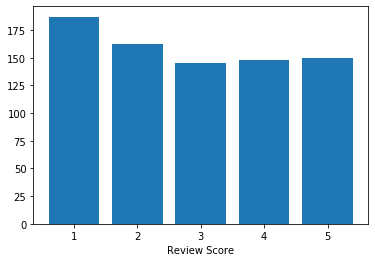

In [48]:
plt.bar(pay_by_review.index, pay_by_review['payment_value'])
plt.xlabel('Review Score');

In [50]:
pay_order_cust_df = pd.merge(payment_order_df, customer_df, how='left', on='customer_id')
pay_order_cust_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21 13:59:17,4291db0da71914754618cd789aebcd56,conchas,SP


In [51]:
revenues_df = pd.DataFrame(pay_order_cust_df.groupby('customer_unique_id')['payment_value'].sum())
revenues_df.sort_values(by='payment_value', ascending=False, inplace=True)
revenues_df.rename(columns={'payment_value':'total_payment'}, inplace=True)
revenues_df.head()

,total_payment
customer_unique_id,
0a0a92112bd4c708ca5fde585afaa872,13664.08
46450c74a0d8c5ca9395da1daac6c120,9553.02
da122df9eeddfedc1dc1f5349a1a690c,7571.63
763c8b1c9c68a0229c42c9fc6f662b93,7274.88
dc4802a71eae9be1dd28f5d788ceb526,6929.31


In [52]:
revenues_df = pay_order_cust_df.groupby('customer_unique_id').sum().sort_values(by='payment_value', ascending=False)
revenues_df.rename(columns={'payment_value':'total_payment'})
revenues_df.head()

,payment_sequential,payment_installments,payment_value
customer_unique_id,,,
0a0a92112bd4c708ca5fde585afaa872,1,1,13664.08
46450c74a0d8c5ca9395da1daac6c120,3,12,9553.02
da122df9eeddfedc1dc1f5349a1a690c,2,20,7571.63
763c8b1c9c68a0229c42c9fc6f662b93,1,1,7274.88
dc4802a71eae9be1dd28f5d788ceb526,1,8,6929.31


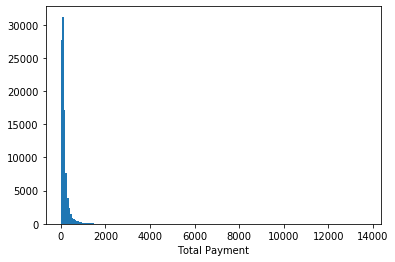

In [53]:
plt.hist(pay_order_cust_df.groupby('customer_unique_id')['payment_value'].sum(), bins=200)
plt.xlabel('Total Payment');

In [60]:
first_time_df = pay_order_cust_df.sort_values('order_purchase_timestamp').groupby('customer_unique_id').apply(lambda x:x.tail(1))

In [61]:
first_time_df = first_time_df.reset_index(drop=True)
first_time_df = first_time_df[['customer_unique_id', 'order_purchase_timestamp']]
first_time_df

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
96091,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
96092,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
96093,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [62]:
#last_date = max(pay_order_cust_df['order_purchase_timestamp'])
last_date = pd.Timestamp('2018-11-25')
#first_time_df.astype({'order_purchase_timestamp':'datetime64[ns]'})
#first_time_df['recency'] = pd.to_datetime(first_time_df['order_purchase_timestamp'])
first_time_df.info()
first_time_df['order_purchase_timestamp'] = first_time_df['order_purchase_timestamp'].apply(lambda x: (last_date - x).days)
first_time_df
first_time_df.rename(columns={'order_purchase_timestamp':'recency'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96095 entries, 0 to 96094
Data columns (total 2 columns):
customer_unique_id          96095 non-null object
order_purchase_timestamp    96095 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ MB


In [63]:
first_time_df

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,198
1,0000b849f77a49e4a4ce2b2a4ca5be3f,201
2,0000f46a3911fa3c0805444483337064,624
3,0000f6ccb0745a6a4b88665a16c9f078,408
4,0004aac84e0df4da2b147fca70cf8255,375
...,...,...
96090,fffcf5a5ff07b0908bd4e2dbc735a684,534
96091,fffea47cd6d3cc0a88bd621562a9d061,349
96092,ffff371b4d645b6ecea244b27531430a,655
96093,ffff5962728ec6157033ef9805bacc48,206


In [ ]:
#pay_order_cust_df = pd.merge(pay_order_cust_df, first_time_df, how='left', on='customer_unique_id')
#pay_order_cust_df

In [84]:
time_revenues_df = pd.merge(revenues_df, first_time_df, on='customer_unique_id')
time_revenues_df['revenue_rate'] = time_revenues_df['payment_value'] / time_revenues_df['recency']
time_revenues_df.sort_values(by='revenue_rate', ascending=False, inplace=True)
time_revenues_df.reset_index(drop=True)

,customer_unique_id,payment_sequential,payment_installments,payment_value,recency,revenue_rate
0,46450c74a0d8c5ca9395da1daac6c120,3,12,9553.02,99,96.495152
1,459bef486812aa25204be022145caa62,1,1,6922.21,122,56.739426
2,763c8b1c9c68a0229c42c9fc6f662b93,1,1,7274.88,132,55.112727
3,c8460e4251689ba205045f3ea17884a1,4,24,4655.91,108,43.110278
4,edde2314c6c30e864a128ac95d6b2112,1,10,4513.32,113,39.940885
...,...,...,...,...,...,...
96090,bd06ce0e06ad77a7f681f1a4960a3cc6,1,1,10.07,437,0.023043
96091,809ca96e9696b9be5f69cd7ae803049d,1,1,12.28,546,0.022491
96092,4079d39cb3fdea47201540107c1673dc,1,1,14.86,667,0.022279
96093,968fac81e2c44fb6c1e3ac2a45e6a102,1,1,0.00,82,0.000000


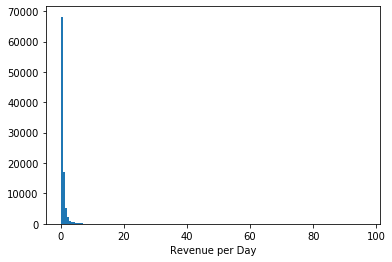

In [80]:
plt.hist(time_revenues_df['revenue_rate'], bins=150);
plt.xlabel('Revenue per Day');

In [81]:
new_df = pd.merge(pay_order_cust_df, time_revenues_df, how='left', on='customer_unique_id')
new_df

,order_id,payment_sequential_x,payment_type,payment_installments_x,payment_value_x,customer_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state,payment_sequential_y,payment_installments_y,payment_value_y,recency,revenue_rate
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG,1,8,99.33,213,0.466338
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP,1,1,24.39,151,0.161523
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP,1,1,65.71,347,0.189366
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG,1,8,107.78,353,0.305326
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,2018-05-21 13:59:17,4291db0da71914754618cd789aebcd56,conchas,SP,4,5,627.74,115,5.458609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,2018-03-08 16:57:23,b6027ac07fb76ebca8c97b1887865aee,atibaia,SP,1,1,363.31,261,1.391992
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,2017-08-18 09:45:35,53b30ca78efb2b7efcd3f9e461587eb2,belo horizonte,MG,2,4,300.47,442,0.679796
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,2017-11-18 17:27:14,d3c7da954a324253814096bcaf240e4e,sao paulo,SP,1,1,47.77,371,0.128760
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,2018-08-07 23:26:13,b84dc68f02f122a88d7e7bbd37b06204,rio de janeiro,RJ,1,5,369.54,109,3.390275


In [100]:
time_revenues_df

,customer_unique_id,payment_sequential,payment_installments,payment_value,recency,revenue_rate
1,46450c74a0d8c5ca9395da1daac6c120,3,12,9553.02,99,96.495152
5,459bef486812aa25204be022145caa62,1,1,6922.21,122,56.739426
3,763c8b1c9c68a0229c42c9fc6f662b93,1,1,7274.88,132,55.112727
11,c8460e4251689ba205045f3ea17884a1,4,24,4655.91,108,43.110278
12,edde2314c6c30e864a128ac95d6b2112,1,10,4513.32,113,39.940885
...,...,...,...,...,...,...
96091,bd06ce0e06ad77a7f681f1a4960a3cc6,1,1,10.07,437,0.023043
96087,809ca96e9696b9be5f69cd7ae803049d,1,1,12.28,546,0.022491
96049,4079d39cb3fdea47201540107c1673dc,1,1,14.86,667,0.022279
96093,968fac81e2c44fb6c1e3ac2a45e6a102,1,1,0.00,82,0.000000


In [102]:
time_revenues_df.loc[1,'customer_unique_id']

'46450c74a0d8c5ca9395da1daac6c120'

In [110]:
time_revenues_df.loc[time_revenues_df['customer_unique_id']=='46450c74a0d8c5ca9395da1daac6c120']

,customer_unique_id,payment_sequential,payment_installments,payment_value,recency,revenue_rate
1,46450c74a0d8c5ca9395da1daac6c120,3,12,9553.02,99,96.495152


In [108]:
pay_order_cust_df.loc[pay_order_cust_df['customer_id']=='46450c74a0d8c5ca9395da1daac6c120']

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_purchase_timestamp,customer_unique_id,customer_city,customer_state


In [107]:
pay_order_cust_df['customer_id']=='46450c74a0d8c5ca9395da1daac6c120'

0         False
1         False
2         False
3         False
4         False
          ...  
103881    False
103882    False
103883    False
103884    False
103885    False
Name: customer_id, Length: 103886, dtype: bool